# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
#cities.sort()
cities_df = pd.DataFrame(cities)
# cities_df.sort_values(by='0', ascending=False)
#cities_df
print(f"Number of cities in the list: {len(cities)}")
print(len(cities))
cities.sort()

Number of cities in the list: 608
608


---

In [3]:
print(cities)

["'ohonua", 'aasiaat', 'aba', 'acaponeta', 'acapulco de juarez', 'adamstown', 'afaahiti', 'akureyri', 'al burayqah', 'al jawf', 'alakurtti', 'alavus', 'albany', 'aldan', 'alice springs', 'alice town', 'aligudarz', 'alo', 'alofi', 'alotau', 'alta', 'am djarass', 'amarpatan', 'ambodifotatra', 'anadyr', 'ancud', 'anshun', 'antofagasta', 'antsiranana', 'argo', "arkhangel'sk", 'arkhara', 'arraial do cabo', 'as sulayyil', 'asau', 'asau village', 'atafu village', 'atbara', 'avarua', 'awjilah', 'axim', 'aykhal', 'azul', 'babayevo', 'badger', 'bafq', 'bafra', 'baishishan', 'bamboo flat', 'bandarbeyla', 'bandon', 'bayan nur', 'bayganin', 'beledweyne', 'belmonte', 'belton', 'berezovyy', 'bergerac', 'berriane', 'bethel', 'betio village', 'bhimunipatnam', 'bhind', 'bikenibeu village', 'bilibino', 'bismarck', 'blackmans bay', 'blenheim', 'bomi', 'bontang', 'bredasdorp', 'brokopondo', 'broome', 'bubaque', 'buka', 'buulobarde', 'caaguazu', 'cabo san lucas', 'caetite', 'caglayancerit', 'caleta de carqu

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | aba
Processing Record 4 of Set 1 | acaponeta
Processing Record 5 of Set 1 | acapulco de juarez
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | akureyri
Processing Record 9 of Set 1 | al burayqah
Processing Record 10 of Set 1 | al jawf
Processing Record 11 of Set 1 | alakurtti
Processing Record 12 of Set 1 | alavus
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | aldan
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | alice town
Processing Record 17 of Set 1 | aligudarz
Processing Record 18 of Set 1 | alo
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | alotau
City not found. Skipping...
Processing Record 21 of Set 1 | alta
Processing Record 22 of Set 1 | am dj

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,2.56,89,100,1.78,GL,1693413665
1,aba,5.1066,7.3667,23.79,87,100,4.21,NG,1693413564
2,acaponeta,22.4964,-105.3594,32.43,62,81,1.51,MX,1693413665
3,acapulco de juarez,16.8634,-99.8901,30.90,66,40,2.06,MX,1693413566
4,adamstown,-25.0660,-130.1015,21.01,92,100,8.36,PN,1693413666
5,afaahiti,-17.7500,-149.2833,21.93,80,100,3.91,PF,1693413666
6,akureyri,65.6835,-18.0878,11.96,71,20,4.63,IS,1693413666
7,al burayqah,30.4062,19.5739,26.88,68,38,7.37,LY,1693413666
8,al jawf,29.5000,38.7500,30.80,18,0,5.17,SA,1693413666
9,alakurtti,66.9672,30.3491,13.75,83,98,1.61,RU,1693413666


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,2.56,89,100,1.78,GL,1693413665
1,aba,5.1066,7.3667,23.79,87,100,4.21,NG,1693413564
2,acaponeta,22.4964,-105.3594,32.43,62,81,1.51,MX,1693413665
3,acapulco de juarez,16.8634,-99.8901,30.90,66,40,2.06,MX,1693413566
4,adamstown,-25.0660,-130.1015,21.01,92,100,8.36,PN,1693413666
5,afaahiti,-17.7500,-149.2833,21.93,80,100,3.91,PF,1693413666
6,akureyri,65.6835,-18.0878,11.96,71,20,4.63,IS,1693413666
7,al burayqah,30.4062,19.5739,26.88,68,38,7.37,LY,1693413666
8,al jawf,29.5000,38.7500,30.80,18,0,5.17,SA,1693413666


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

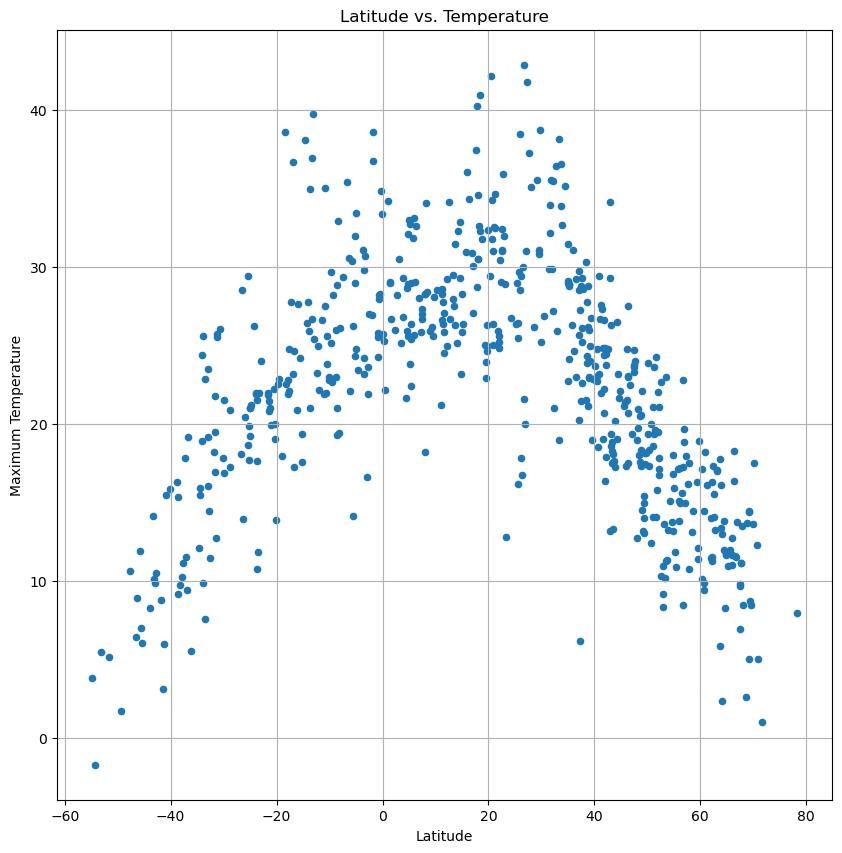

In [26]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(10,10), 
title="Latitude vs. Temperature")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

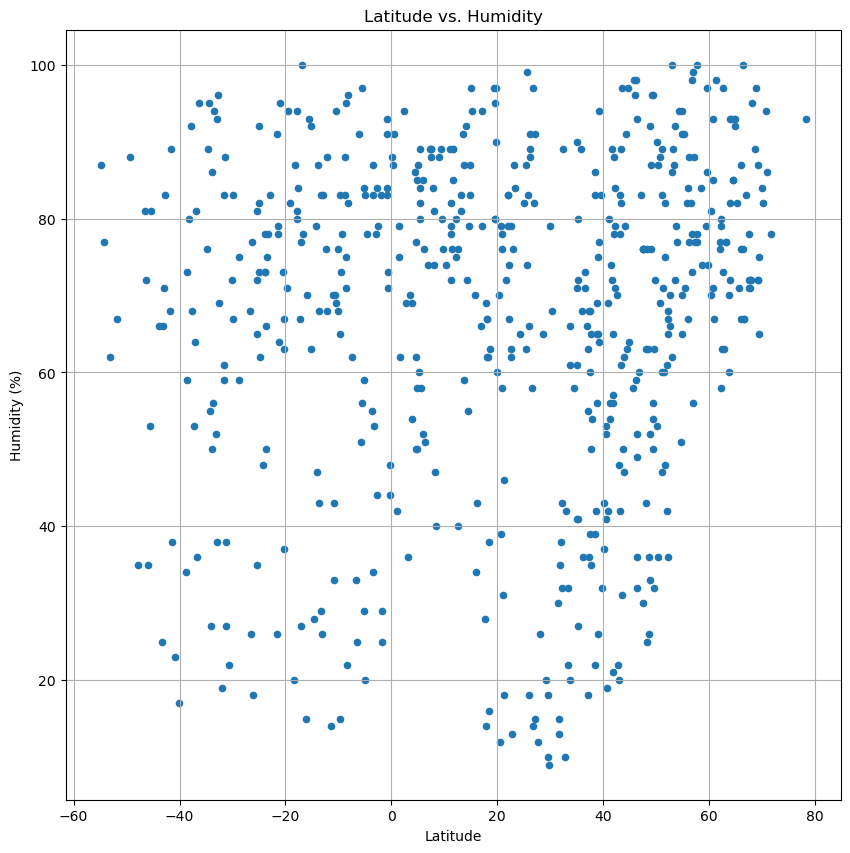

In [28]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(10,10), 
title="Latitude vs. Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

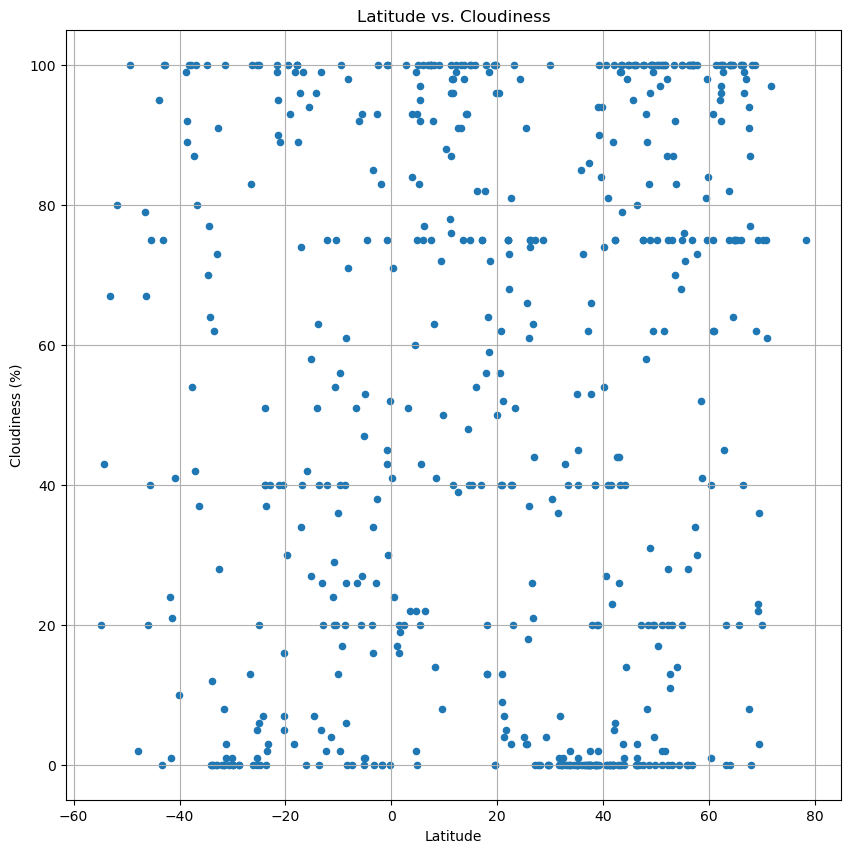

In [29]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(10,10), 
title="Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

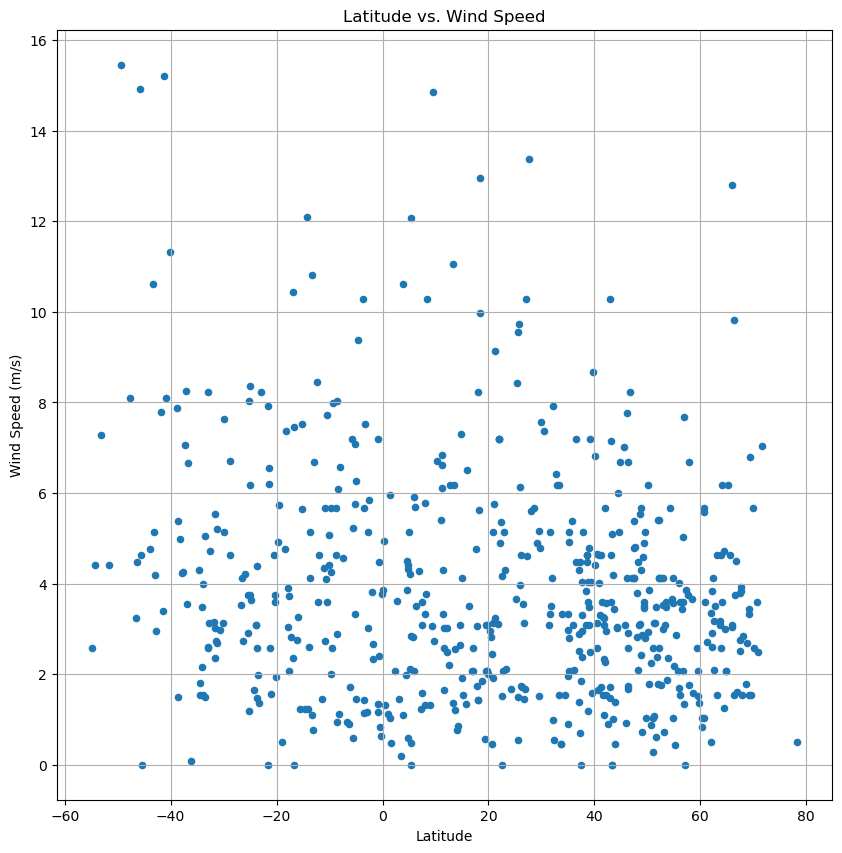

In [30]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(10,10), 
title="Latitude vs. Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

In [14]:
# # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0])

# Display sample data
northern_hemi_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,2.56,89,100,1.78,GL,1693413665
1,aba,5.1066,7.3667,23.79,87,100,4.21,NG,1693413564
2,acaponeta,22.4964,-105.3594,32.43,62,81,1.51,MX,1693413665
3,acapulco de juarez,16.8634,-99.8901,30.90,66,40,2.06,MX,1693413566
6,akureyri,65.6835,-18.0878,11.96,71,20,4.63,IS,1693413666
7,al burayqah,30.4062,19.5739,26.88,68,38,7.37,LY,1693413666
8,al jawf,29.5000,38.7500,30.80,18,0,5.17,SA,1693413666
9,alakurtti,66.9672,30.3491,13.75,83,98,1.61,RU,1693413666
10,alavus,62.5833,23.6167,14.07,97,100,3.18,FI,1693413666


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <=0])

# Display sample data
southern_hemi_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,21.01,92,100,8.36,PN,1693413666
5,afaahiti,-17.7500,-149.2833,21.93,80,100,3.91,PF,1693413666
13,alice springs,-23.7000,133.8833,10.75,50,0,2.57,AU,1693413666
17,alofi,-19.0595,-169.9187,17.94,82,93,0.51,NU,1693413668
20,ambodifotatra,-16.9833,49.8500,23.20,77,74,10.45,MG,1693413668
22,ancud,-41.8697,-73.8203,8.77,68,24,7.79,CL,1693413668
24,antofagasta,-23.6500,-70.4000,17.60,66,37,4.39,CL,1693413455
25,antsiranana,-12.2787,49.2917,23.22,76,2,8.45,MG,1693413669
29,arraial do cabo,-22.9661,-42.0278,23.98,83,40,8.23,BR,1693413669


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between temp. and latitude in Northern Hemisphere is: -0.75


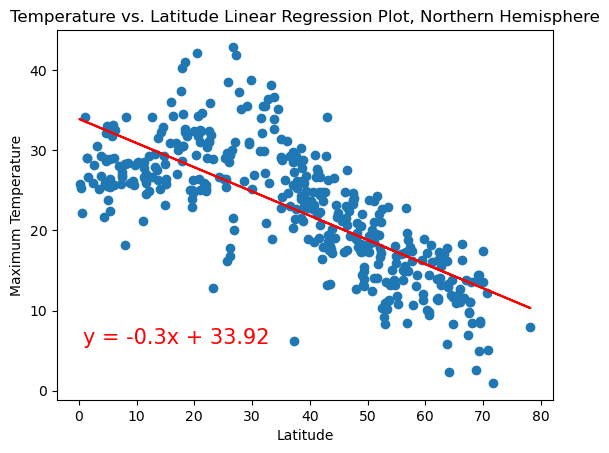

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.8,5.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs. Latitude Linear Regression Plot, Northern Hemisphere')
print(f"The correlation coefficient between temp. and latitude in Northern Hemisphere is: {round(correlation[0],2)}")
plt.show()

The correlation coefficient between temp. and latitude in Southern Hemisphere is: 0.77


The r-value is: 0.7748669438860093


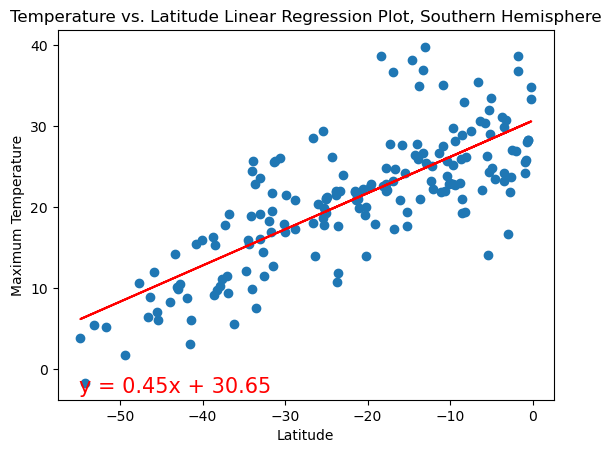

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,-3),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs. Latitude Linear Regression Plot, Southern Hemisphere')
print(f"The correlation coefficient between temp. and latitude in Southern Hemisphere is: {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.show()

## Analysis: Linear relationship between a city's latitude and its temperature 
* Based on the data, there is a strong relationship between a city's latitude, or closeness
    to the equator, and its temperature
* The two scatter plot charts above illustrate clearely that the closer a city is
    to the equator (whether in the northern or southern hemisphere), the higher
    their maximum temperature (plotted in celsius)
* The correlation coefficient (r-value) for cities in the northern hemisphere was a -0.75. As their distance in
    latitude increases from the equator, their maximum temperatures were lower.
* The The correlation coefficient (r-value) for cities in the southern hemisphere was a +.77. As their distance
    in latitude to the came closer (from -50 to 0), their maximum temperature increased

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between humidity and latitude in Northern Hemisphere is: 0.12


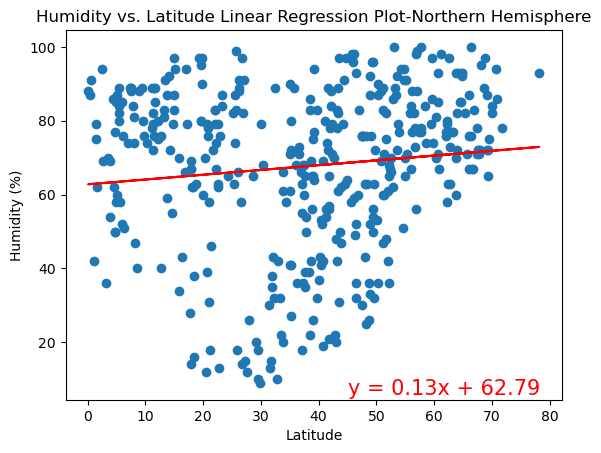

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude Linear Regression Plot-Northern Hemisphere')
print(f"The correlation coefficient between humidity and latitude in Northern Hemisphere is: {round(correlation[0],2)}")
plt.show()

The correlation coefficient between humidity and latitude in Southern Hemisphere is: 0.02
The r-value is: 0.0227095465219331


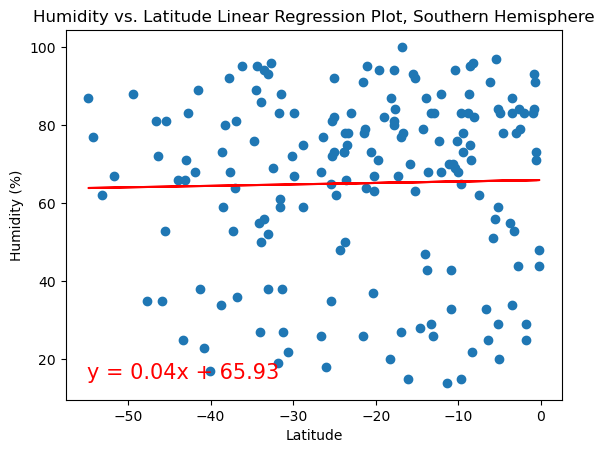

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude Linear Regression Plot, Southern Hemisphere')
print(f"The correlation coefficient between humidity and latitude in Southern Hemisphere is: {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.show()

## Analysis: Linear relationship between a city's humidity and its latitude
* According to the data, there is no real relationship between a city's humidity and its latitude, 
    in cities in either northern or southern hemisphere.
* The correlation coefficient between humidity and latitude in cities in the Northern Hemisphere is: 0.12
* The correlation coefficient between humidity and latitude in cities in the Southern Hemisphere is: 0.02 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between cloudiness and latitude in Northern Hemisphere is: 0.03


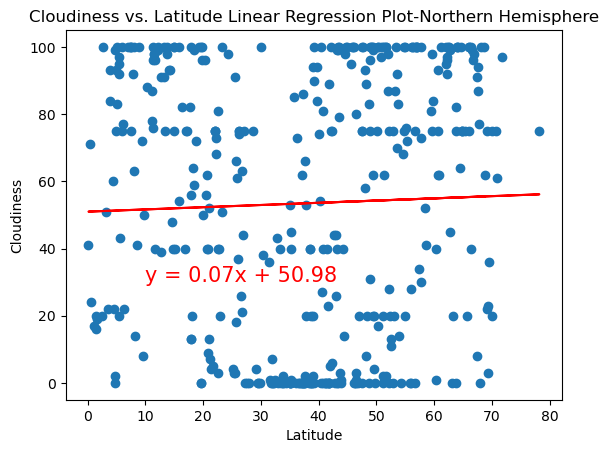

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot-Northern Hemisphere')
print(f"The correlation coefficient between cloudiness and latitude in Northern Hemisphere is: {round(correlation[0],2)}")
plt.show()

The correlation coefficient between cloudiness and latitude in Southern Hemisphere is: -0.06
The r-value is: -0.06146674593027399


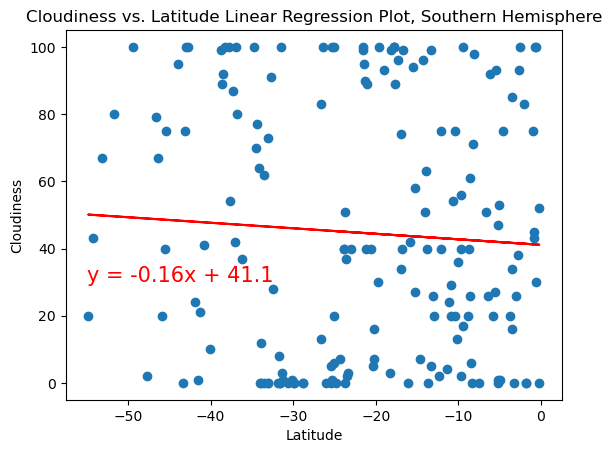

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot, Southern Hemisphere')
print(f"The correlation coefficient between cloudiness and latitude in Southern Hemisphere is: {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.show()

## Analysis: Linear relationship between a city's cloudiness and its latitude
* According to the data, there is no real relationship between a city's cloudiness and its latitude, 
    in cities in either northern or southern hemisphere.
* The correlation coefficient between cloudiness and latitude in cities in the Northern Hemisphere is: 0.03
* The correlation coefficient between cloudiness and latitude in cities in the Southern Hemisphere is: -0.06 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between wind speed and latitude in Northern Hemisphere is: -0.09


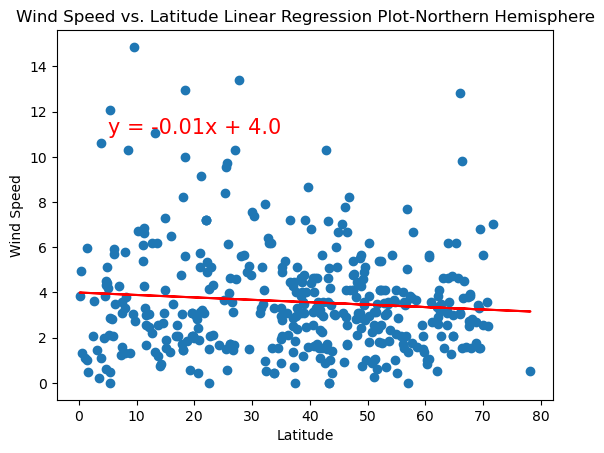

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot-Northern Hemisphere')
print(f"The correlation coefficient between wind speed and latitude in Northern Hemisphere is: {round(correlation[0],2)}")
plt.show()

The correlation coefficient between wind speed and latitude in Southern Hemisphere is: -0.18
The r-value is: -0.18446297691720567


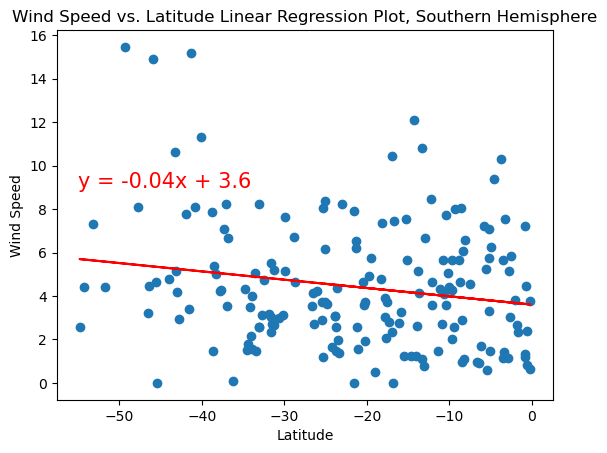

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot, Southern Hemisphere')
print(f"The correlation coefficient between wind speed and latitude in Southern Hemisphere is: {round(correlation[0],2)}")
print(f"The r-value is: {rvalue}")
plt.show()

## Analysis: Linear relationship between a city's wind speed and its latitude
* According to the data, there is no real relationship between a city's cloudiness and its latitude, 
    in cities in either northern or southern hemisphere.
* The correlation coefficient between wind speed and latitude in cities in the Northern Hemisphere is: -0.09
* The correlation coefficient between wind speed and latitude in cities in the Southern Hemisphere is: -0.18 